
[def]: attachment:HXMM5UG.png




<div style="text-align: right; direction: rtl;">
در این چالش قصد داریم با توجه به تصویری از یک صفحه شطرنج
تشخیص دهیم کدام بازیکن تعداد مهره های بیشتری دارد
مدل شما باید به ازای هر تصویر
در صورتی که در آن تصویر بازیکن سفید تعداد مهره های بیشتری داشته
خروجی 1 را برگردانده و در صورتی که بازیکن سیاه مهره های بیشتری داشته 0 را خروجی دهد
                               در صورت تساوی تعداد مهره های دو بازیکن مدل باید خروجی -1 را برگرداند
</div>

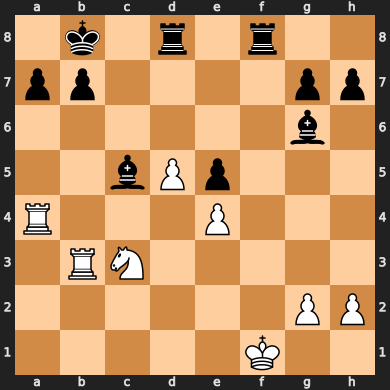

بازیکن سیاه مهره های بیشتری نسبت به بازیکن سفید دارد. (سیاه: 10، سفید: 8)        

In [3]:
!cp /content/drive/MyDrive/Colab\ Notebooks/model_utils.py /content
!cp /content/drive/MyDrive/Colab\ Notebooks/train.py /content
!cp /content/drive/MyDrive/Colab\ Notebooks/predict_utils.py /content
!cp /content/drive/MyDrive/Colab\ Notebooks/vis_utils.py /content

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import model_utils

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

# Our libraries
from train import train_model
from model_utils import *
from predict_utils import *
from vis_utils import *

# some initial setup
np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(1234)

In [ ]:
use_gpu

True

In [ ]:
!nvidia-smi

Fri Mar 24 14:41:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
DATA_DIR = '/content/drive/MyDrive/P/Problem01/'
sz = 224
batch_size = 32

In [ ]:
# !apt install unzip

In [ ]:
!unzip -u "/content/drive/MyDrive/Problem01/Problem01.zip" -d "/content/drive/MyDrive/P"

Archive:  /content/drive/MyDrive/Problem01/Problem01.zip
  inflating: /content/drive/MyDrive/P/Problem01/test/img7548.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7549.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img755.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7550.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7551.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7552.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7553.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7554.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7555.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7556.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7557.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7558.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img7559.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img756.png  
  infla

In [ ]:
# import shutil

# # absolute path
# for i in range(2000):
#   src_path =  f"/content/drive/MyDrive/Problem01/Problem01/Problem01/train/-1/img ({i+1}).png"
#   dst_path = r"/content/drive/MyDrive/Problem01/Problem01/Problem01/valid/-1"
#   shutil.move(src_path, dst_path)


In [ ]:
os.listdir(DATA_DIR)

['test', 'train']

In [ ]:
trn_dir = f'{DATA_DIR}train'
val_dir = f'{DATA_DIR}valid'

In [ ]:
# os.listdir(val_dir)

In [ ]:
trn_fnames = glob.glob(f'{trn_dir}/*/*.png')
trn_fnames[:5]

['/content/drive/MyDrive/P/Problem01/train/-1/img (1).png',
 '/content/drive/MyDrive/P/Problem01/train/-1/img (10).png',
 '/content/drive/MyDrive/P/Problem01/train/-1/img (100).png',
 '/content/drive/MyDrive/P/Problem01/train/-1/img (1000).png',
 '/content/drive/MyDrive/P/Problem01/train/-1/img (1001).png']

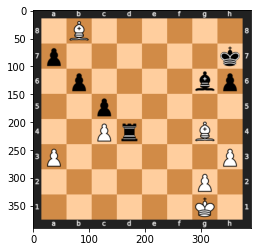

In [ ]:
img = plt.imread(trn_fnames[1])
plt.imshow(img);

In [ ]:
train_ds = datasets.ImageFolder(trn_dir)

In [ ]:
train_ds.classes


['-1', '0', '1']

In [ ]:
import cv2



import numpy as np



def adjust_contrast(image, alpha, beta):
    # Multiply each pixel value by alpha to increase contrast
    adjusted_image = np.multiply(image, alpha)
    # Add beta to each pixel value to adjust brightness
    adjusted_image = np.add(adjusted_image, beta)
    # Clip the pixel values to the range [0, 255]
    adjusted_image = np.clip(adjusted_image, 0, 255)
    adjusted_image = adjusted_image.astype(np.uint8)
    # Convert the pixel values to uint8 data type
    #adjusted_image  = cv2.cvtColor(adjusted_image, cv2.COLOR_RGB2GRAY)
    return adjusted_image

In [ ]:
class AdjustContrast(object):
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
        
    def __call__(self, img):
        img = np.array(img)
        img = adjust_contrast(img, self.alpha, self.beta)
        img = Image.fromarray(img)
        return img

In [ ]:
!rm -R '/content/drive/MyDrive/Problem01/Problem01/Problem01/valid/ .ipynb_checkpoints'

rm: cannot remove '/content/drive/MyDrive/Problem01/Problem01/Problem01/valid/ .ipynb_checkpoints': No such file or directory


In [ ]:
tfms = transforms.Compose([
    transforms.Resize((224, 224)),  # PIL Image
    #IncreaseContrast(),
    #transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    AdjustContrast(1.2, 45),
    transforms.ToTensor(),        # Tensor
   
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
   

])


train_ds = datasets.ImageFolder(trn_dir, transform=tfms)
#valid_ds = datasets.ImageFolder(val_dir, transform=tfms)

In [ ]:
# len(train_ds)
len(train_ds)


37052

In [ ]:
train_dl = torch.utils.data.DataLoader(train_ds, 
                                       batch_size=batch_size, 
                                       shuffle=True, 
                                       num_workers=8)

# valid_dl = torch.utils.data.DataLoader(valid_ds, 
#                                        batch_size=batch_size, 
#                                        shuffle=False, 
#                                        num_workers=8)


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


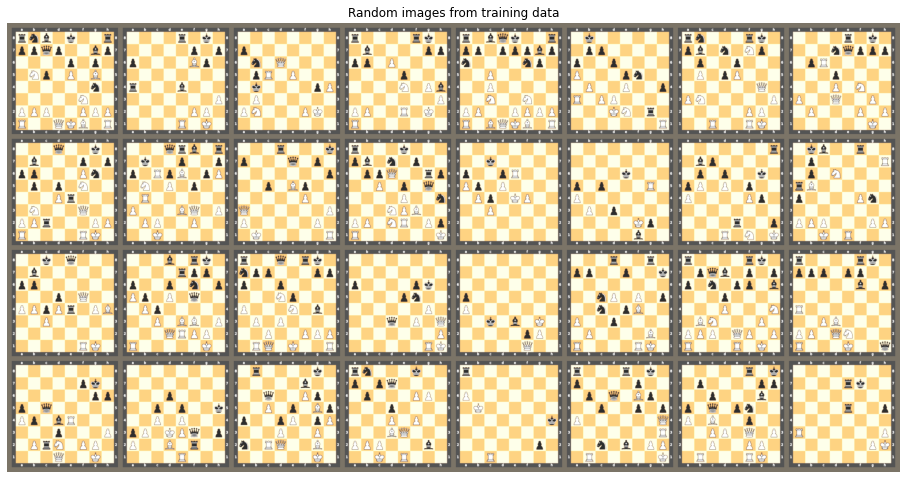

In [ ]:
inputs, targets = next(iter(train_dl))
out = torchvision.utils.make_grid(inputs, padding=10)
plt.figure(figsize=(16, 12))
imshow(out, title='Random images from training data')


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2) #112
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2) #56
        )


        
        self.fc = nn.Linear(56*56*32, 1024)
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 3)
        

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        #out = self.conv6(out)
        out = out.view(out.size(0), -1)  # flatten
        out = F.relu(self.fc(out))
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        
        out = self.fc4(out)
        return out

In [ ]:
model = SimpleCNN()

# transfer model to GPU, if gpu is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)


In [ ]:
num_epochs = 50
losses = []

for epoch in range(num_epochs):
  
    
    for i, (inputs, targets) in enumerate(train_dl):
        
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # forwad pass
        outputs = model(inputs)
        
        # loss
        loss = criterion(outputs, targets)
        losses.append(loss.item())

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        # report
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_ds) // batch_size, loss.item()))
                  !unzip -u "/content/drive/MyDrive/Problem01/Problem01.zip" -d "/content/drive/MyDrive/P"
            
            
            


Archive:  /content/drive/MyDrive/Problem01/Problem01.zip
  inflating: /content/drive/MyDrive/P/Problem01/test/img10010.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10011.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10012.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10013.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10014.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10015.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10016.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10017.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10018.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10019.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img1002.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10020.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img10021.png  
  inflating: /content/drive/MyDrive/P/Problem01/test/img1002

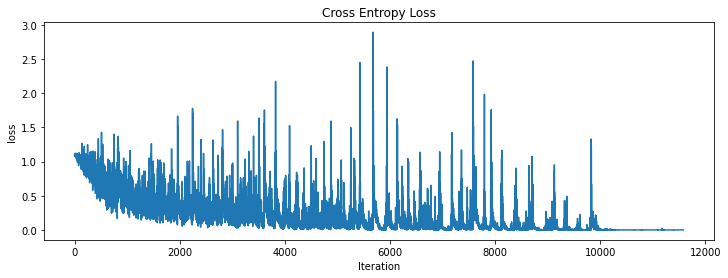

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('Cross Entropy Loss')
plt.show()

In [ ]:
def evaluate_model(model, dataloader, device):
    model.eval()  # for batch normalization layers
    corrects = 0
    
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()
    
    print('accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset)))
    

In [ ]:
# evaluate_model(model, valid_dl, device)

In [ ]:
    !unzip -u "/content/drive/MyDrive/Problem01/Problem01.zip" -d "/content/drive/MyDrive/P"

Archive:  /content/drive/MyDrive/Problem01/Problem01.zip
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3407).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3408).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3409).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (341).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3410).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3411).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3412).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3413).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3414).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3415).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3416).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1/img (3417).png  
  inflating: /content/drive/MyDrive/P/Problem01/train/-1

In [ ]:
evaluate_model(model, train_dl, device)


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd07e25c5e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd07e25c5e0>
Traceback (most recent call last):
Exception ignored in:   File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fd07e25c5e0>    
self._shutdown_workers()Traceback (most recent call last):

  File "/usr/local/lib/python3

accuracy: 100.00


In [ ]:
def lab(model):
    p=[]
    for i in range(19065):
  
        img_path = f'/content/drive/MyDrive/P/Problem01/test/img{i}.png'
        img = Image.open(img_path)
        img = tfms(img)
        img = img.unsqueeze(0)

        model.eval()  # for batch normalization layers
        with torch.no_grad():
            class_names=['-1','0','1']
            inputs = img.to(device)
            outputs = model(inputs)
            _,preds = torch.max( outputs, 1)
    
            #result=preds[0]['scores'].cpu().numpy()
            result=preds.cpu().numpy()
            pred_class_names = [class_names[i] for i in result]
            p+= pred_class_names
    return p

In [ ]:
lab=lab(model)

In [ ]:
import csv

with open('predictions.csv', 'w', newline='') as file:
     writer = csv.writer(file)
     for i in range(len(lab)) :
          writer.writerow([f"img{i}", f"{lab[i]}"])
    

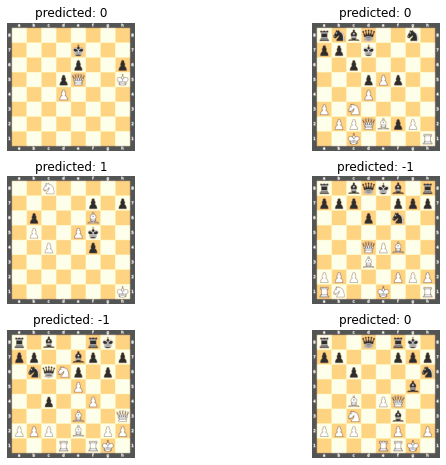

In [ ]:
visualize_model(model, train_dl, device)


In [ ]:
plot_errors(model, valid_dl, device)


NameError: ignored